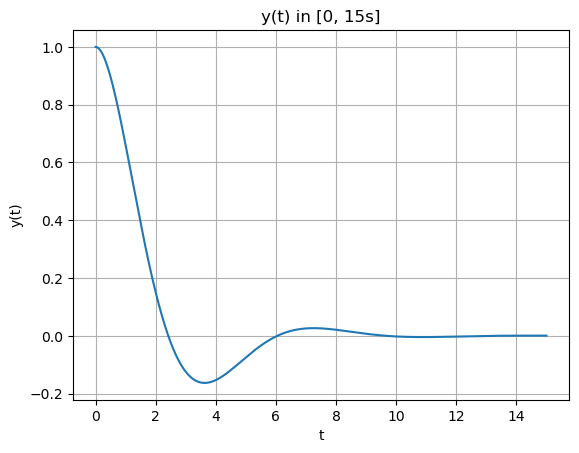

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode

def diff_eq(eq, t):
    y1, y2 = eq[0], eq[1]
    dy1 = y2
    dy2 = - y2 - y1
    return [dy1, dy2]

y0 = [1.0, 0.0]
t = np.linspace(0, 15, 1000)
y = odeint(diff_eq, y0, t)

fig, axes = plt.subplots()
axes.plot(t, y[:,0], label="y(t)")
axes.set_xlabel('t')
axes.set_ylabel('y(t)')
axes.set_title('y(t) in [0, 15s]')
axes.grid(True)
plt.show();

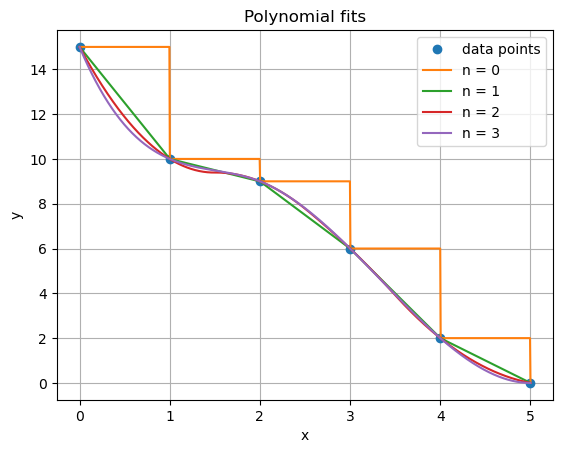

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import *

data = [[0, 15], [1, 10], [2, 9], [3, 6], [4, 2], [5, 0]]
x = np.zeros(len(data))
y = np.zeros(len(data))
for ii in range(len(data)):
    x[ii] = data[ii][0]
    y[ii] = data[ii][1]

xx = np.linspace(x[0], x[-1], 1000)
n = 3
polys = np.zeros((n+1, 1000))
for ii in range(n+1):
    poly_func = make_interp_spline(x, y, k=ii)
    polys[ii] = poly_func(xx)

fig, axes = plt.subplots()
axes.plot(x, y, 'o', label="data points")
for ii in range(n+1):
    axes.plot(xx, polys[ii][:], label=f"n = {ii}")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Polynomial fits')
axes.legend(loc=1)
axes.grid(True)
plt.show();

The solution of 


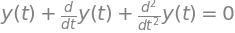

with initial conditions 


is 


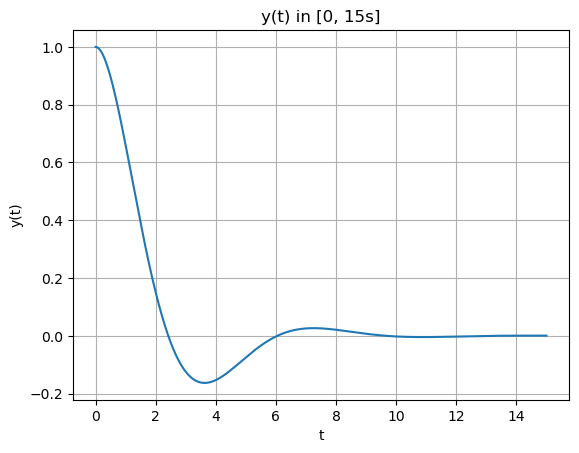


Solution using SciPy and SymPy are both equivalent

However, dsolve in SymPy takes much longer than odeint in SciPy


In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

t = Symbol('t')
y = Function('y')
ypp = y(t).diff(t, 2)
yp = y(t).diff(t)
diff_eq = Eq(ypp + yp + y(t), 0)
sol = dsolve(diff_eq, y(t), ics={y(t).subs(t, 0): 1, yp.subs(t, 0): 0})
print("The solution of ") 
display(diff_eq)
print("with initial conditions ")
display(Eq(y(t).subs(t, 0), 1))
display(Eq(yp.subs(t, 0), 0))
print("is ") 
display(sol)
y = sol.rhs

t_vec = np.linspace(0, 15, 1000)
y_vec = np.zeros(len(t_vec))
for ii in range(len(t_vec)):
    y_vec[ii] = N(y.subs(t, t_vec[ii]))

fig, axes = plt.subplots()
axes.plot(t_vec, y_vec, label="y(t)")
axes.set_xlabel('t')
axes.set_ylabel('y(t)')
axes.set_title('y(t) in [0, 15s]')
axes.grid(True)
plt.show();

print("\nSolution using SciPy and SymPy are both equivalent")
print("\nHowever, dsolve in SymPy takes much longer than odeint in SciPy")